# Accounting Analytics  Lab 5-1: Retail Industry Descriptive Statistics

**Keywords:** Descriptive Statistics, Graph, Retail IndustryLab 

**Insight:** Descriptive analysis uses facts and statistics to explain what happened. In this lab, we report descriptive statistics on the retail industry to get a better feel for what was reported as financial outcomes during 2018.

**Required:**

1.Compute descriptive statistics for the assets, sales, and income for the retail industry in 2018.

2.Calculate return on assets and create a histogram showing theperformance across the dataset.

**Ask the Question:** What was the distribution of assets and ROA in 2018 for the retail industry?

**Master the Data:** The reported results of financial performance are included in the dataset for the retail industry.

In [1]:
# Import key library functions needed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Part 1: Data Reading and Initial Exploration

**Step 1:** Open the Excel File *Lab-5-1-Data.xlsx* and view the first few rows:

In [2]:
df = pd.read_excel('./Lab_5_1_Data.xlsx')
df.head()

,Global Company Key,Data Date,Data Year - Fiscal,Ticker Symbol,Assets - Total,Net Income (Loss),Sales (Net),Standard Industry Classification Code
0,116104,20180131,2017,0190A,1201.007,-124.959,2370.118,5621
1,145977,20181231,2018,AAP,9040.648,423.847,9580.554,5531
2,30059,20180131,2017,AEO,1816.313,204.163,3795.549,5600
3,64768,20181231,2018,AMZN,162648.000,10073.000,232887.000,5961
4,63643,20180131,2017,ANF,2325.692,7.094,3492.690,5651


**Step 2:** Display summary statistics for *Assets - Total* column.

In [3]:
df['Assets - Total'].describe()

count       161.000000
mean       8695.315708
std       26733.194302
min           6.998000
25%         480.932000
50%        1413.613000
75%        5722.051000
max      204522.000000
Name: Assets - Total, dtype: float64

**Step 3:** Add Return on Assets (ROA) Column: ROA = Net Income (Loss) / Totak Assets

In [4]:
df['ROA'] = df['Net Income (Loss)'] / df['Assets - Total']
df.head()

,Global Company Key,Data Date,Data Year - Fiscal,Ticker Symbol,Assets - Total,Net Income (Loss),Sales (Net),Standard Industry Classification Code,ROA
0,116104,20180131,2017,0190A,1201.007,-124.959,2370.118,5621,-0.104045
1,145977,20181231,2018,AAP,9040.648,423.847,9580.554,5531,0.046882
2,30059,20180131,2017,AEO,1816.313,204.163,3795.549,5600,0.112405
3,64768,20181231,2018,AMZN,162648.000,10073.000,232887.000,5961,0.061931
4,63643,20180131,2017,ANF,2325.692,7.094,3492.690,5651,0.003050


**Step 4:** Display ROA Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B0E2ABDC8>]],
      dtype=object)

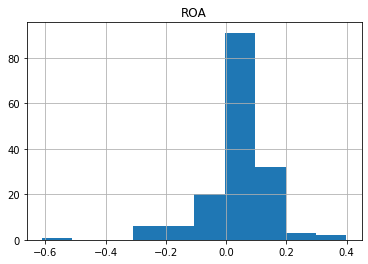

In [5]:
df.hist('ROA')

## Part 2: Questions and Exercises

**Question 1:** What is the mean Net Income for 2018 for the retail industry ($ millions)?

In [6]:
np.mean(df.loc[(df['Data Year - Fiscal'] == 2018)]['Net Income (Loss)'])

595.2132608695654

**Question 2:**  What is the mean Sales (net) for 2018 for the retail industry ($ millions)?

In [7]:
np.mean(df[df['Data Year - Fiscal'] == 2018]['Sales (Net)'])

15987.724275362314

**Question 3:** . Which is more likely to be negative? Sales (Net) or net income?

In [8]:
print('Negative Count (Sales):', df[df['Sales (Net)'] < 0].shape[0])

Negative Count (Sales): 0


In [9]:
print('Negative Count (Net Income):', df[df['Net Income (Loss)'] < 0].shape[0])

Negative Count (Net Income): 34


Answer: Net Income is more likely to be negative.

**Question 4:**  Which observation is the outlier for return on sales?

In [10]:
outlier_limit = 2 * np.std(df['ROA'])
mean = np.mean(df['ROA'])
print('Outlier Range [lower, upper]:', [mean - outlier_limit, mean + outlier_limit])

Outlier Range [lower, upper]: [-0.18997491632715863, 0.27325018543321017]


**Question 5:**  What is the maximum net income achieved in 2018 for the retail industry ($ millions)?

In [11]:
np.max(df[df['Data Year - Fiscal'] == 2018]['Net Income (Loss)'])

10073.0

**Question 6:**  How many values are in the -1.03 to 0.07 bin (in the ROA Histogram)?

In [12]:
val_count = df[(df['ROA'] >= -1.03) & (df['ROA'] < 0.07)]
print('Count of values in range:', val_count.shape[0])

Count of values in range: 98


**Question 7:**  How many bins of the histogram have values in them?

In [13]:
# These values can be adjusted for the bin.
bin_width = 0.1
min_bin_left_edge = -0.7
num_bins = 10
bins = {}

# Loop through each bin and count the number of values.
for i in range(num_bins):
    v = round(min_bin_left_edge + (i * bin_width), 1)
    ct = df[(df['ROA'] >= v) & (df['ROA'] < v + bin_width)].shape[0]
    if ct > 0:
        bins[v] = ct
        
# Print hte result.
print('Nonzero bins (by left edge):', bins)

Nonzero bins (by left edge): {-0.7: 1, -0.3: 6, -0.2: 7, -0.1: 20, 0.0: 91, 0.1: 31, 0.2: 3}


**Question 8:**  What is the median sales number?

In [14]:
np.median(df['Sales (Net)'])

2370.118

**Question 9:**  How many items are included in the dataset?

In [15]:
df.shape[0]

161

**Question 10:**  What is the standard deviation of sales?

In [16]:
np.std(df['Sales (Net)'])

49304.58140224692